<a href="https://colab.research.google.com/github/M-Pushkar-Varshney-K/CipherSchools-Hybrid-DS-ML/blob/Final-Project/Exploratory_Data_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA:

In [ ]:
import pandas as pd
import numpy as np

#importing dataSet (Mall_Customers.csv)
df = pd.read_csv('cleaned_mall_customers.csv')

In [ ]:
df.describe()# decribe everything about the data...)like: size, mean, std, etc.

,Customer_Id,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,39.010000,60.704082,50.317949
std,57.879185,0.497633,13.801533,25.663148,25.346869
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,29.000000,42.750000,35.000000
50%,100.500000,1.000000,36.000000,60.852041,50.000000
75%,150.250000,1.000000,49.000000,78.000000,72.250000
max,200.000000,1.000000,70.000000,137.000000,99.000000


# Visualizing the data:

**Histograms for age, annual income, and spending score distributions.**

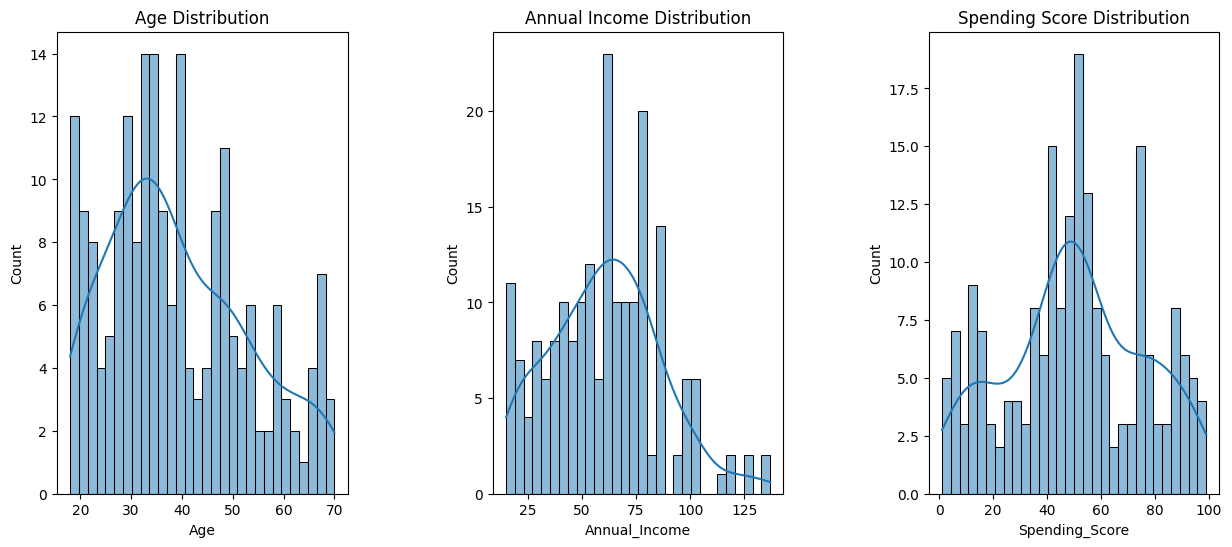

In [ ]:
# import matplot, seaborn and plotly for good experience visuals
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.subplot(1 , 3 , 1)
sns.histplot(data=df, x='Age',bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1 , 3 , 2)
sns.histplot(df['Annual_Income'], bins=30, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1 , 3 , 3)
sns.histplot(df['Spending_Score'], bins=30, kde=True)
plt.title('Spending Score Distribution')

plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
plt.show()

# PIE chart
# plt.figure(figsize=(10, 6))
# gender_counts = df['Gender'].value_counts()
# plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
# plt.title('Gender Distribution')
# plt.show()

**A scatter plot of annual income vs. spending score, colored by gender.**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

gender_map = {0: 'Male', 1: 'Female'}
color_map = {'Male': 'blue', 'Female': 'red'}
df['Gender_Label'] = df['Gender'].map(gender_map)

# Create a subplot with 1 row and 3 columns
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Income vs Spending Score', 'Income vs Spending Score', 'Gender Distribution'),
    specs=[[{"type": "xy"}, {"type": "xy"}, {"type": "pie"}]]
)

# Create and add the histogram
histogram = px.histogram(df, x='Annual_Income', y='Spending_Score', color='Gender_Label',
                         nbins=15,color_discrete_map=color_map)
for trace in histogram.data:
    fig.add_trace(trace, row=1, col=1)

# Create and add the scatter plot
scatter = px.scatter(df,x='Annual_Income',y='Spending_Score',color='Gender_Label',
                    color_discrete_map=color_map)
for trace in scatter.data:
    fig.add_trace(trace, row=1, col=2)

# Create and add the pie chart
pie = px.pie(df, names='Gender_Label', title='Gender Distribution',hole=0.5,
             color='Gender_Label', color_discrete_map=color_map)
for trace in pie.data:
    fig.add_trace(trace, row=1, col=3)

# Update the layout to improve appearance
fig.update_layout(
    title_text='Combined Visualizations',
    title_x=0.5,
    template='plotly_white',
    font=dict(size=14),
    legend_title_text='Gender'
)

# Show the combined figure
fig.show()